In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import PIL.Image
from PIL import ImageOps


from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception

In [2]:
import cv2
import random

import tqdm
import seaborn as sns
# Image display
from IPython.display import display, Image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation


In [3]:
labels_csv = pd.read_csv('/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/labels.csv')

In [4]:
labels_csv.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [5]:
labels_csv.breed.nunique()

120

In [6]:
labels_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [7]:
H=128
W=128
C=3

In [8]:
train_file_location = '/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/train/' 
train_data = labels_csv.assign(img_path = lambda x : train_file_location + x['id'] + '.jpg')
train_data.head()

,id,breed,img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/drive/MyDrive/JSHEN7/DL/dog-breed-ide...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/drive/MyDrive/JSHEN7/DL/dog-breed-ide...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/drive/MyDrive/JSHEN7/DL/dog-breed-ide...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/drive/MyDrive/JSHEN7/DL/dog-breed-ide...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/drive/MyDrive/JSHEN7/DL/dog-breed-ide...


In [9]:
# Creating image paths from the name
filenames = [train_file_location + fname + ".jpg" for fname in labels_csv['id']]

In [10]:
from keras.preprocessing.image import load_img,img_to_array, ImageDataGenerator
count = 0
xlist = []
for img in train_data['img_path'].values.tolist():
    x = img_to_array(load_img(img,target_size = (H,W)))
    xlist.append(x)
    count+=1
    if count%100==0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200


In [11]:

# X = np.array([img_to_array(load_img(img)) for img in train_data['img_path'].values.tolist()])
X = np.array(xlist)
Y = pd.get_dummies(train_data['breed'])


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.25)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7666, 128, 128, 3) (7666, 120)
(2556, 128, 128, 3) (2556, 120)


## dont run yet

In [13]:
labels = pd.read_csv('/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/labels.csv')

In [14]:
def append_extention(fn):
    return fn+".jpg"
labels["id"] = labels["id"].apply(append_extention)

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0],
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  #zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.1 
                                  )

In [16]:
batch_size = 64
image_size=(128,128)
train_generator = train_datagen.flow_from_dataframe(
                                    dataframe=labels,
                                    directory='/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/train/',
                                    x_col='id',
                                    y_col='breed',
                                    subset='training',
                                    batch_size=batch_size,
                                    seed=42,
                                    shuffle=True,
                                    class_mode='categorical',
                                    target_size=image_size,
                                    color_mode='rgb' 
)

Found 9200 validated image filenames belonging to 120 classes.


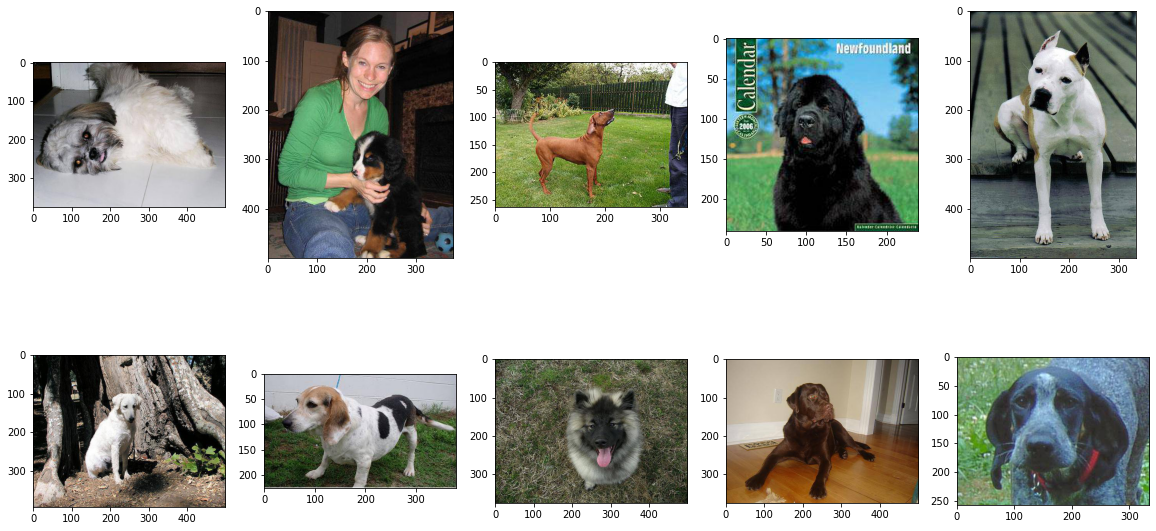

In [17]:
src_path = '/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/train/'
sub_class = os.listdir(src_path)

plt.figure(figsize=(20,10))
for i in range(len(sub_class[:10])):
    plt.subplot(2, 5, i+1)
    img = plt.imread(os.path.join(src_path,sub_class[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [18]:
x,y = next(train_generator)

In [19]:
valid_generator = train_datagen.flow_from_dataframe(
                                            dataframe=labels,
                                            directory='/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/train/',
                                            x_col='id',
                                            y_col='breed',
                                            subset='validation',
                                            batch_size=batch_size,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=image_size,
                                            color_mode='rgb')

Found 1022 validated image filenames belonging to 120 classes.


### till here

## Base CNN Model

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,Activation

In [21]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(H,W,C)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('sigmoid'))

model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(Y.shape[1]))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [22]:
batch=64
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'])

## Model validation and prediction

In [23]:
checkimprovement = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [24]:
train_generator.n

9200

In [25]:
# trained_model=model.fit(X_train,Y_train,
#          epochs=70,
#          batch_size=batch,
#          steps_per_epoch=X_train.shape[0]//batch,
#          validation_steps=X_test.shape[0]//batch,
#          validation_data=(X_test,Y_test),
#          verbose=2)

step_size_train = train_generator.n//batch
step_size_val = valid_generator.n//batch

trained_model=model.fit(train_generator,
         epochs=70,
         batch_size=batch,
         steps_per_epoch=step_size_train,
         validation_steps=step_size_val,
         validation_data=valid_generator,
         verbose=2)

Epoch 1/70
143/143 - 52s - loss: 4.8352 - accuracy: 0.0096 - val_loss: 4.7862 - val_accuracy: 0.0135 - 52s/epoch - 366ms/step
Epoch 2/70
143/143 - 40s - loss: 4.7909 - accuracy: 0.0099 - val_loss: 4.7887 - val_accuracy: 0.0125 - 40s/epoch - 278ms/step
Epoch 3/70
143/143 - 39s - loss: 4.7844 - accuracy: 0.0105 - val_loss: 4.7528 - val_accuracy: 0.0177 - 39s/epoch - 276ms/step
Epoch 4/70
143/143 - 40s - loss: 4.6804 - accuracy: 0.0169 - val_loss: 4.6200 - val_accuracy: 0.0146 - 40s/epoch - 278ms/step
Epoch 5/70
143/143 - 40s - loss: 4.5851 - accuracy: 0.0227 - val_loss: 4.5763 - val_accuracy: 0.0167 - 40s/epoch - 280ms/step
Epoch 6/70
143/143 - 39s - loss: 4.5264 - accuracy: 0.0311 - val_loss: 4.5473 - val_accuracy: 0.0312 - 39s/epoch - 276ms/step
Epoch 7/70
143/143 - 41s - loss: 4.4640 - accuracy: 0.0366 - val_loss: 4.5107 - val_accuracy: 0.0385 - 41s/epoch - 284ms/step
Epoch 8/70
143/143 - 41s - loss: 4.4002 - accuracy: 0.0452 - val_loss: 4.4824 - val_accuracy: 0.0354 - 41s/epoch - 289

In [26]:
import os

dir_path = '/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/test/'
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

10357


In [27]:
test_datagen = ImageDataGenerator()

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/',
    target_size = (128,128),
    classes=['test']
)
y_pred = model.predict(test_set)

Found 10357 images belonging to 1 classes.


In [28]:
y_pred

array([[9.5109817e-06, 3.0703053e-05, 4.0635869e-06, ..., 9.7693926e-05,
        8.0160754e-07, 3.0968364e-03],
       [4.9537864e-08, 9.2784331e-12, 8.1638400e-06, ..., 5.1991021e-05,
        3.6644323e-07, 6.1680536e-11],
       [1.2012027e-09, 1.7093381e-04, 7.2548172e-04, ..., 6.3108236e-02,
        1.0156658e-05, 3.4202653e-06],
       ...,
       [1.1518412e-09, 3.4218512e-08, 1.5569295e-08, ..., 2.4205105e-05,
        1.5723465e-04, 2.1012509e-06],
       [4.3186985e-11, 2.2277584e-06, 4.0761770e-07, ..., 6.0737733e-04,
        2.1091462e-03, 4.5125003e-04],
       [2.1388332e-05, 6.0380227e-03, 5.0195253e-05, ..., 2.0309722e-04,
        5.0902250e-05, 4.1992034e-06]], dtype=float32)

In [29]:
submission = pd.read_csv('/content/drive/MyDrive/JSHEN7/DL/dog-breed-identification/sample_submission.csv')
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [30]:
import re
file_list = test_set.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)
    
submission['id'] = id_list
submission.iloc[:,1:] =y_pred
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,9.510982e-06,3.070305e-05,4.063587e-06,2.296875e-06,5.793008e-06,7.447671e-09,1.205121e-04,6.257729e-06,4.421327e-09,...,1.163216e-04,6.729845e-10,4.331620e-09,2.935654e-07,1.245299e-04,2.654688e-09,2.025940e-06,9.769393e-05,8.016075e-07,3.096836e-03
1,00102ee9d8eb90812350685311fe5890,4.953786e-08,9.278433e-12,8.163840e-06,6.305062e-06,1.814030e-06,1.810265e-02,6.395994e-12,6.422661e-07,8.637303e-09,...,1.652257e-10,3.906235e-06,4.289785e-09,1.145206e-06,1.676052e-01,2.379549e-10,1.807036e-11,5.199102e-05,3.664432e-07,6.168054e-11
2,0012a730dfa437f5f3613fb75efcd4ce,1.201203e-09,1.709338e-04,7.254817e-04,2.683122e-07,3.855910e-05,1.567220e-06,5.011622e-07,7.007232e-05,1.268517e-07,...,6.792372e-04,9.210701e-07,3.287152e-08,1.524030e-04,1.957957e-04,1.034910e-05,4.974286e-05,6.310824e-02,1.015666e-05,3.420265e-06
3,001510bc8570bbeee98c8d80c8a95ec1,4.721636e-13,1.063240e-08,6.946761e-16,1.523407e-09,3.548602e-07,1.619730e-11,2.846216e-10,6.419666e-06,5.330662e-05,...,1.937350e-08,5.319336e-07,6.345883e-12,1.231852e-05,7.614457e-10,5.752334e-04,2.704414e-09,5.788897e-10,1.110737e-04,4.893775e-09
4,001a5f3114548acdefa3d4da05474c2e,6.686960e-08,4.049095e-06,1.492598e-05,1.123048e-04,4.183101e-04,3.947678e-06,9.687452e-08,7.918679e-05,1.484490e-08,...,5.846415e-04,2.287547e-07,6.528585e-05,1.376705e-06,2.705679e-03,1.535522e-03,7.912707e-07,1.026527e-01,5.787370e-09,5.847200e-08


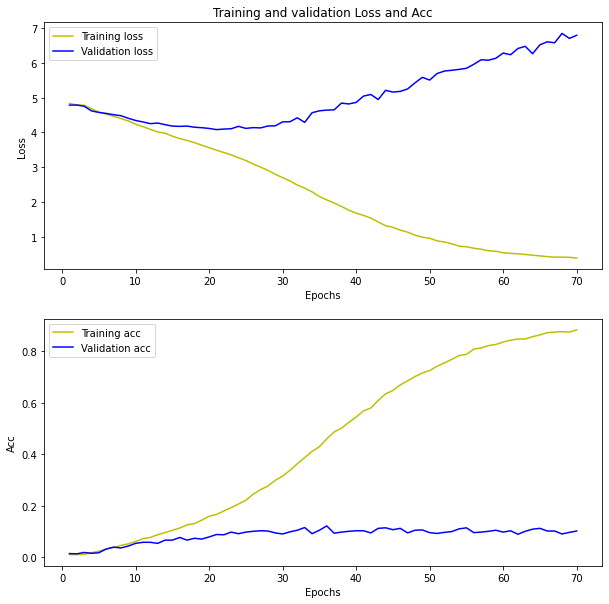

In [31]:
history_dict = trained_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'y', label = 'Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation Loss and Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'y', label = 'Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label = 'Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()